In [ ]:
import math
import numpy as np
from functools import partial
import matplotlib.pyplot as pt
from matplotlib.font_manager import FontProperties

In [ ]:
def sample(low_bound, upper_bound, size):
  tmp = np.random.random_sample((size,))*(upper_bound-low_bound)
  return low_bound + tmp

In [ ]:
def g_avg(x, g_d_fun, n_samples, tar_fun):
    b_at_x = 0
    g_d_funs = []
    for i in range(n_samples):
        x_1, x_2 = sample(-1, 1, 2) 
        v = g_d_fun(x, x_1, x_2) 
        g_d_funs.append(v)
        
    g_avg_x = np.mean(g_d_funs)
    g_var_x = np.var(g_d_funs)
    b_at_x = (g_avg_x - tar_fun(x))**2
    return g_avg_x, g_var_x, b_at_x

In [ ]:
def print_out(vs, bs, eouts):
    variance = np.mean(vs)    
    bias = np.mean(bs)
    print(f'Variance:   {variance}')
    print(f'Bias:       {bias}')
    print(f'E_out:      {np.mean(eouts)}')
    print(f'Var + Bias: {variance+bias}')

In [ ]:
def compute_statistics(x_vals, g_d_fun, n_D, tar_fun):  
    true_fs, avg_gfs, var_gfs, upper_bounds, low_bounds = [], [], [], [], []
    for x in x_vals:
        true_fs.append(tar_fun(x))
        mean_g, var_g, bias_g = g_avg(x, g_d_fun, n_D, tar_fun)
        avg_gfs.append(mean_g)
        var_gfs.append(var_g)
        upper_bounds.append(mean_g + np.sqrt(var_g))
        low_bounds.append(mean_g - np.sqrt(var_g))
    return true_fs, avg_gfs, var_gfs, upper_bounds, low_bounds

In [ ]:
def plot_graph(x_vals, true_fs, avg_gfs, upper_bounds, low_bounds):
    pt.plot(x_vals, true_fs, color='red', label='True Function')
    pt.plot(x_vals, avg_gfs, color='green', label='Average Hypothesis g_bar')
    pt.plot(x_vals, upper_bounds, color='blue', label='Upper bound (of H_avg)')
    pt.plot(x_vals, low_bounds, color='grey', label='Lower bound (of H_avg)')
    pt.legend(['True Function', 
                'H_avg g_bar',
                'Upper bound (of H_avg)',
                'Lower bound(of H_avg)'], 
               loc='center left', 
              bbox_to_anchor=(1, 0.5))

In [ ]:
def compute_eout(g_d_fun, tar_fun, n_D, n_x):
    vs, bs, eouts = [], [], [] # Variances, Biases, Eouts
    for i in range(n_x):
        x = sample(-1, 1, 1)
        _, variance, bias = g_avg(x, g_d_fun, n_D, tar_fun)
        vs.append(variance)
        bs.append(bias)

        eout_D = []
        for i in range(n_D):
            x1, x2 = sample(-1, 1, 2)
            v= g_d_fun(x, x1, x2)
            eout_D.append((v-tar_fun(x))**2) 
        eouts.append(np.mean(eout_D))

    print_out(vs, bs, eouts)
    x_vals = np.arange(-1, 1, 0.01)
    true_fs, avg_gfs, var_gfs, upper_bounds, low_bounds = compute_statistics(x_vals, g_d_fun, n_D, tar_fun)
    plot_graph(x_vals, true_fs, avg_gfs, upper_bounds, low_bounds)

Variance:   0.3361738275178239
Bias:       0.20263724758922513
E_out:      0.5372777510298774
Var + Bias: 0.538811075107049


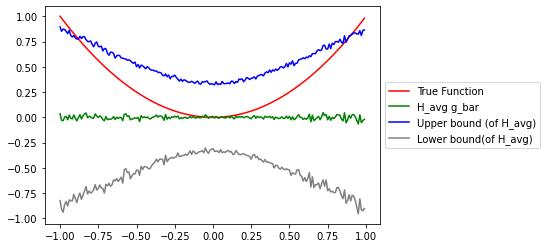

In [ ]:
n_D, n_x = 1000, 1000 
def g_d_fun(x, x1, x2):
    return (x1 + x2)*x + (-x1 * x2)
compute_eout(g_d_fun, lambda x: x**2, n_D, n_x)